In [ ]:
# Title - ONGC (Oil and Natural Gas Corporation) Stock Price Analysis Using Python
# About the project - This project explores historical stock data of ONGC to uncover patterns in price movements, trading volumes, and volatility over time. Using Python-based data analysis, the aim is to transform raw market data into actionable insights through clean visual storytelling.
# Project Aim - To extract meaningful insights from ONGC’s historical stock data using Python tools and techniques such as time series visualization, rolling averages, and return distribution analysis — helping understand long-term patterns and short-term fluctuations.

In [2]:
# Managing working directorys
%pwd
%cd "C:/Users/Hp/Desktop/Python_Project"
%pwd

C:\Users\Hp\Desktop\Python_Project


'C:\\Users\\Hp\\Desktop\\Python_Project'

In [6]:
#Importing important library 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [8]:
#Importing ONGC Stock Price Raw Data 
Stock_df = pd.read_csv("ONGC_Stock_RawData.csv")

In [10]:
#Extracting Basic Information
print(Stock_df.shape)
print(Stock_df.info())

(7124, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      7124 non-null   object 
 1   open      7114 non-null   float64
 2   high      7114 non-null   float64
 3   low       7114 non-null   float64
 4   close     7114 non-null   float64
 5   adjclose  7114 non-null   float64
 6   volume    7114 non-null   float64
 7   ticker    7124 non-null   object 
dtypes: float64(6), object(2)
memory usage: 445.4+ KB
None


In [12]:
#Exploration of Raw Data 
print(Stock_df.describe())

              open         high          low        close     adjclose  \
count  7114.000000  7114.000000  7114.000000  7114.000000  7114.000000   
mean    121.707468   123.506457   119.701760   121.507015    75.545111   
std      72.080964    73.055927    70.990402    71.957474    53.755343   
min      10.622222    11.311111    10.566666    10.988888     3.416595   
25%      40.034722    40.777779    39.555553    40.022221    15.883293   
50%     138.666672   140.708336   136.575005   138.558334    84.665977   
75%     179.674999   181.979168   176.666672   179.212494   113.629057   
max     313.333344   314.566681   298.666656   310.433319   283.750000   

             volume  
count  7.114000e+03  
mean   8.465638e+06  
std    1.140461e+07  
min    0.000000e+00  
25%    1.548630e+06  
50%    5.892982e+06  
75%    1.084513e+07  
max    2.922325e+08  


In [14]:
#Examining null values
print(Stock_df.isnull())
print(Stock_df.isnull().sum())

       Date   open   high    low  close  adjclose  volume  ticker
0     False  False  False  False  False     False   False   False
1     False  False  False  False  False     False   False   False
2     False  False  False  False  False     False   False   False
3     False  False  False  False  False     False   False   False
4     False  False  False  False  False     False   False   False
...     ...    ...    ...    ...    ...       ...     ...     ...
7119  False  False  False  False  False     False   False   False
7120  False  False  False  False  False     False   False   False
7121  False  False  False  False  False     False   False   False
7122  False  False  False  False  False     False   False   False
7123  False  False  False  False  False     False   False   False

[7124 rows x 8 columns]
Date         0
open        10
high        10
low         10
close       10
adjclose    10
volume      10
ticker       0
dtype: int64


In [16]:
# Removing the features which had more than 50% null values
Stock_df = Stock_df.dropna(thresh = len(Stock_df)*0.5, axis = 1)
print(Stock_df)
print(Stock_df.isnull().sum())

           Date        open        high         low       close    adjclose  \
0      1/1/1996   18.888887   18.972221   18.777777   18.799999    5.640412   
1      1/2/1996   18.799999   19.277777   18.844444   19.088888    5.727086   
2      1/3/1996   19.333332   19.333332   18.888887   18.888887    5.667081   
3      1/4/1996   18.888887   18.900000   18.500000   18.894444    5.668749   
4      1/5/1996   18.894444   18.905556   18.666666   18.900000    5.670415   
...         ...         ...         ...         ...         ...         ...   
7119  4/23/2024  276.850006  278.750000  275.549988  276.799988  276.799988   
7120  4/24/2024  277.600006  280.399994  276.299988  279.350006  279.350006   
7121  4/25/2024  279.350006  282.600006  278.000000  281.950012  281.950012   
7122  4/26/2024  283.000000  286.149994  282.200012  282.899994  282.899994   
7123  4/29/2024  283.950012  285.250000  282.149994  283.200012  283.200012   

          volume   ticker  
0        10800.0  ONGC.

In [18]:
# Filling null values by ffill(forward fill) and bfill(backward fill) technique to maintain the consistency
Stock_df = Stock_df.fillna(method="ffill").fillna(method="bfill")
print(Stock_df)
print(Stock_df.isnull().sum())

           Date        open        high         low       close    adjclose  \
0      1/1/1996   18.888887   18.972221   18.777777   18.799999    5.640412   
1      1/2/1996   18.799999   19.277777   18.844444   19.088888    5.727086   
2      1/3/1996   19.333332   19.333332   18.888887   18.888887    5.667081   
3      1/4/1996   18.888887   18.900000   18.500000   18.894444    5.668749   
4      1/5/1996   18.894444   18.905556   18.666666   18.900000    5.670415   
...         ...         ...         ...         ...         ...         ...   
7119  4/23/2024  276.850006  278.750000  275.549988  276.799988  276.799988   
7120  4/24/2024  277.600006  280.399994  276.299988  279.350006  279.350006   
7121  4/25/2024  279.350006  282.600006  278.000000  281.950012  281.950012   
7122  4/26/2024  283.000000  286.149994  282.200012  282.899994  282.899994   
7123  4/29/2024  283.950012  285.250000  282.149994  283.200012  283.200012   

          volume   ticker  
0        10800.0  ONGC.

C:\Users\Hp\AppData\Local\Temp\ipykernel_15504\266561068.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Stock_df = Stock_df.fillna(method="ffill").fillna(method="bfill")


In [20]:
#Droping duplicate values
Stock_df = Stock_df.drop_duplicates()
print(Stock_df)
print(Stock_df.isnull().sum())

           Date        open        high         low       close    adjclose  \
0      1/1/1996   18.888887   18.972221   18.777777   18.799999    5.640412   
1      1/2/1996   18.799999   19.277777   18.844444   19.088888    5.727086   
2      1/3/1996   19.333332   19.333332   18.888887   18.888887    5.667081   
3      1/4/1996   18.888887   18.900000   18.500000   18.894444    5.668749   
4      1/5/1996   18.894444   18.905556   18.666666   18.900000    5.670415   
...         ...         ...         ...         ...         ...         ...   
7119  4/23/2024  276.850006  278.750000  275.549988  276.799988  276.799988   
7120  4/24/2024  277.600006  280.399994  276.299988  279.350006  279.350006   
7121  4/25/2024  279.350006  282.600006  278.000000  281.950012  281.950012   
7122  4/26/2024  283.000000  286.149994  282.200012  282.899994  282.899994   
7123  4/29/2024  283.950012  285.250000  282.149994  283.200012  283.200012   

          volume   ticker  
0        10800.0  ONGC.

In [22]:
# Converting date feature into datetime formate 
Stock_df["Date"] = pd.to_datetime(Stock_df["Date"])
print(Stock_df)

           Date        open        high         low       close    adjclose  \
0    1996-01-01   18.888887   18.972221   18.777777   18.799999    5.640412   
1    1996-01-02   18.799999   19.277777   18.844444   19.088888    5.727086   
2    1996-01-03   19.333332   19.333332   18.888887   18.888887    5.667081   
3    1996-01-04   18.888887   18.900000   18.500000   18.894444    5.668749   
4    1996-01-05   18.894444   18.905556   18.666666   18.900000    5.670415   
...         ...         ...         ...         ...         ...         ...   
7119 2024-04-23  276.850006  278.750000  275.549988  276.799988  276.799988   
7120 2024-04-24  277.600006  280.399994  276.299988  279.350006  279.350006   
7121 2024-04-25  279.350006  282.600006  278.000000  281.950012  281.950012   
7122 2024-04-26  283.000000  286.149994  282.200012  282.899994  282.899994   
7123 2024-04-29  283.950012  285.250000  282.149994  283.200012  283.200012   

          volume   ticker  
0        10800.0  ONGC.

In [24]:
#Ensuring that the dataset is 100% clean or not 
print(Stock_df.head(5))
print(Stock_df.isnull().sum())
print(Stock_df.info())

        Date       open       high        low      close  adjclose   volume  \
0 1996-01-01  18.888887  18.972221  18.777777  18.799999  5.640412  10800.0   
1 1996-01-02  18.799999  19.277777  18.844444  19.088888  5.727086  27000.0   
2 1996-01-03  19.333332  19.333332  18.888887  18.888887  5.667081  10800.0   
3 1996-01-04  18.888887  18.900000  18.500000  18.894444  5.668749  41400.0   
4 1996-01-05  18.894444  18.905556  18.666666  18.900000  5.670415  46800.0   

    ticker  
0  ONGC.NS  
1  ONGC.NS  
2  ONGC.NS  
3  ONGC.NS  
4  ONGC.NS  
Date        0
open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      7124 non-null   datetime64[ns]
 1   open      7124 non-null   float64       
 2   high      7124 non-null   f

In [26]:
#Examining Text columns from dataset (name, count)
for col in Stock_df.select_dtypes(include="object").columns:
    print(f"\n{col} value count:\n",Stock_df[col].value_counts())


ticker value count:
 ticker
ONGC.NS    7124
Name: count, dtype: int64


['open', 'high', 'low', 'close', 'adjclose', 'volume', 'MA_20', 'MA_50']


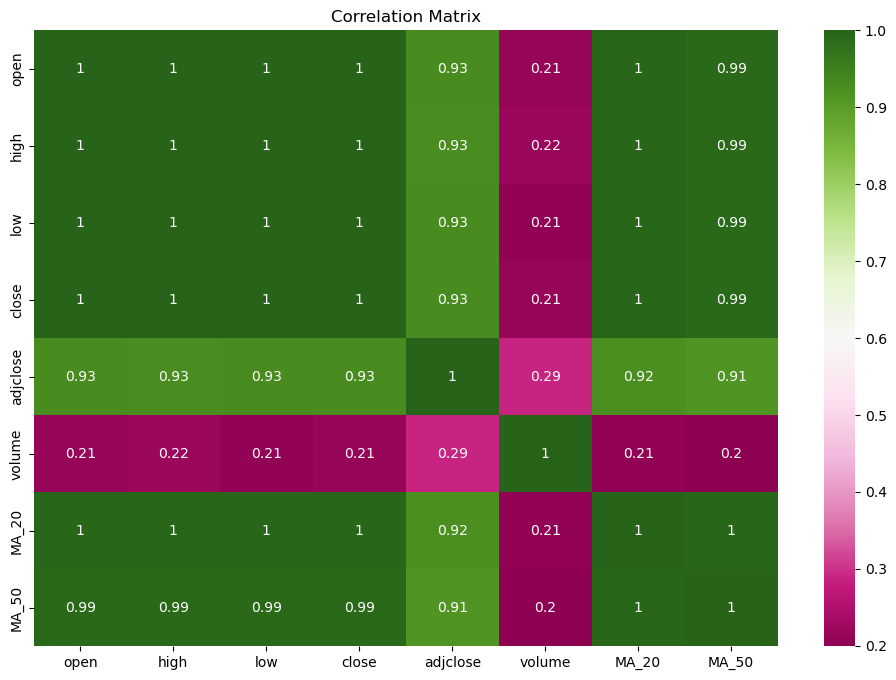

In [42]:
# Droping the text column before plotting the correlation matrix because correlation method (corr()) not supports text values
#Stock_df.drop("ticker",axis=1, inplace=True )

# Dropping date columns to avoide the misleadings
#Stock_df.drop("Date", axis=1,inplace=True)

# Plotting of Correlation matrix on cleaned data for analysis
print(Stock_df.columns.tolist())
plt.figure(figsize=(12,8))
sns.heatmap(Stock_df.corr(),annot=True, cmap="PiYG")
plt.title("Correlation Matrix")
plt.show()

In [32]:
# Insights about Correlation plot
# Correlation means (+1 [Strong positive both go up together], 0 [No relation], -1[Strong negatice one goes up, other goes dow])
# [open vs close] -> Correlation 1.0 -> Strong positive 
# [adjclose vs close] -> Correlation 0.93 -> Very Strong positive 
# [volume vs open/high/low/close] -> Correlation ~0.22 -> Very weak correlation

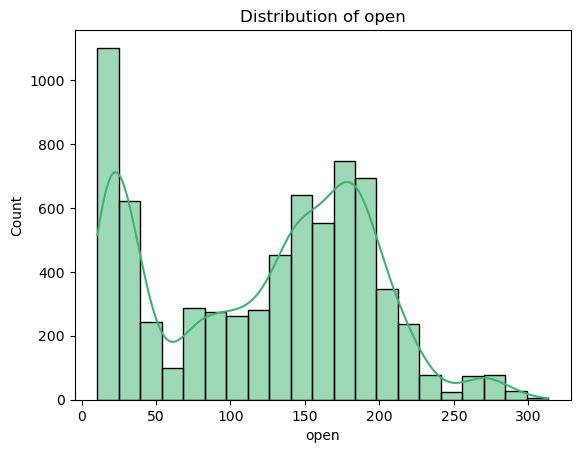

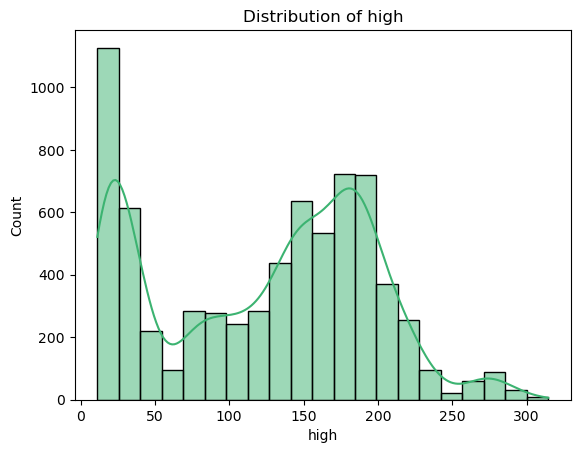

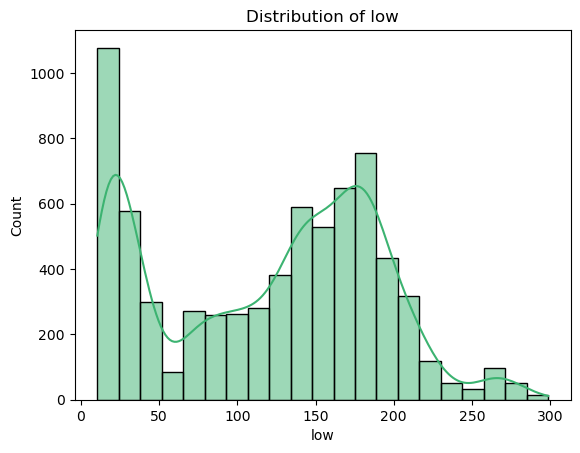

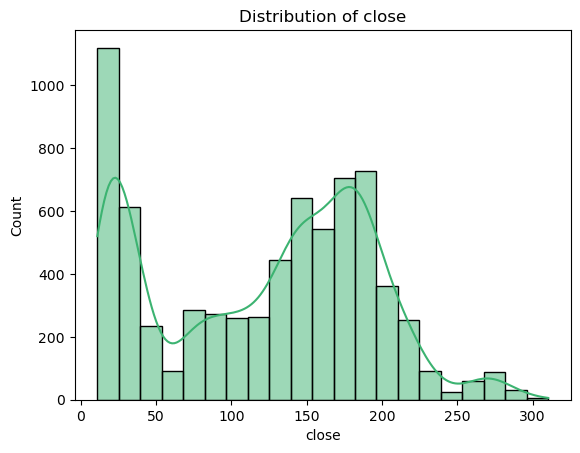

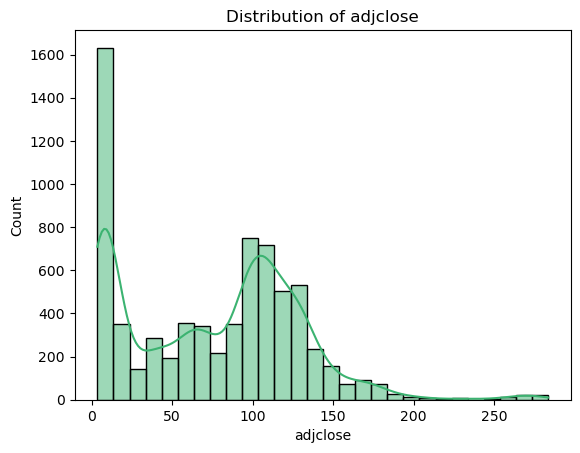

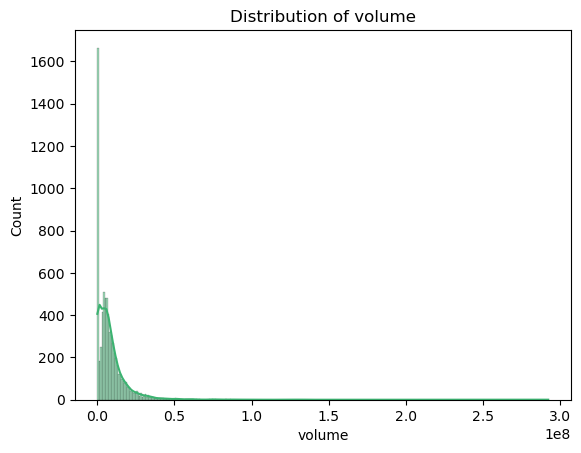

In [34]:
# Plotting of histogram (open price, high price, low price, close price, adjust colser, volume)
# track the continuity in stock price 
for col in Stock_df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(Stock_df[col],kde=True,color="mediumseagreen")
    plt.title(f"Distribution of {col}")
    plt.show()

In [36]:
# Insight about the Histogram + KDE graph

# Distribution of open :- There are 2 major peaks one at around low value (0-50) another at (150-200)
# lots of stocks opens at low price with another cluster present in mid range this is right skewed (more data on left)
# --------------------------------------------------------------------------------------------------------------------
# Distribution of high :- High price during the day similar shape to the (open distribution), again 2 peaks at 
# low and mid range, slightly right skewed indicates a few high value
# --------------------------------------------------------------------------------------------------------------------
# Distribution of low :- low price during the day similar shape as (open & high distribution), again 2 peaks at 
# low and mid range, some stocks drops very low even if they open high
# --------------------------------------------------------------------------------------------------------------------
# Distribution of close :- close price of stocks similar shape as (open,high & low distribution), again 2 peaks at 
# low and mid range, shows the opening stock price is same as closing price at almost same level
# --------------------------------------------------------------------------------------------------------------------
# Distribution of adjclose :- Adjusted for splits,dividends, mostly more concentrantion seen at near low level 
# fewer values at the high range
# --------------------------------------------------------------------------------------------------------------------
# Distribution of volume :- Total no. of shares traded, highly right skewed most of stocks have low trading volume 
# few hav very high voluem as we can see at right side

# The stock price of ONGC has been trading flat based above analysis 

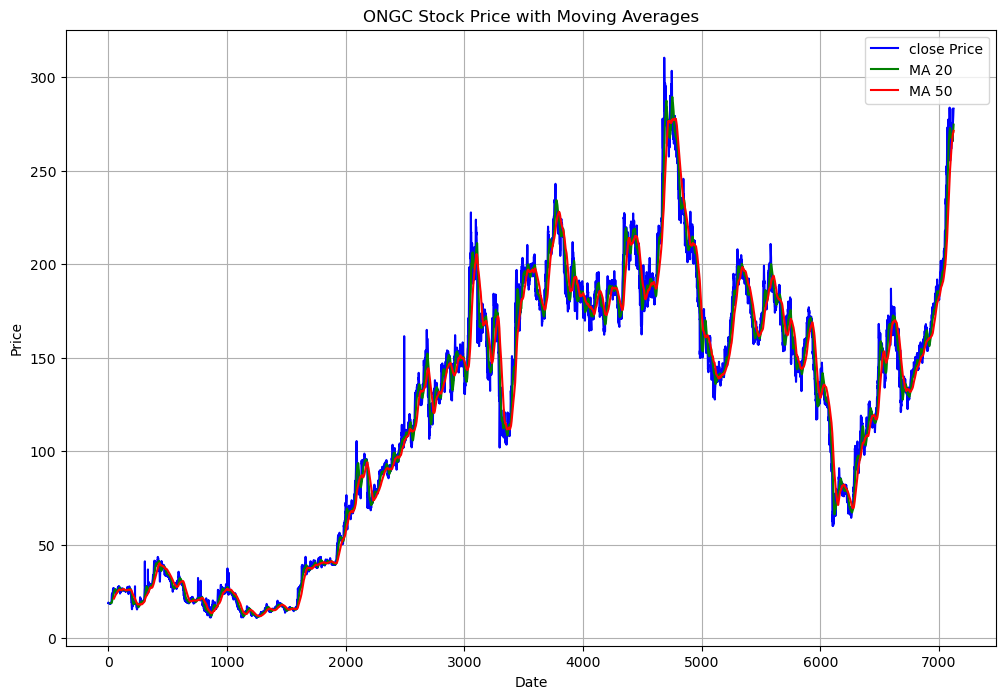

In [38]:
# Calculate 20-day and 50-day moving averages
Stock_df['MA_20'] = Stock_df['close'].rolling(window=20).mean()
Stock_df['MA_50'] = Stock_df['close'].rolling(window=50).mean()

# Plot the moving averages with closing price
plt.figure(figsize=(12, 8))
plt.plot(Stock_df['close'], label='close Price', color='blue')
plt.plot(Stock_df['MA_20'], label='MA 20', color='green')
plt.plot(Stock_df['MA_50'], label='MA 50', color='red')
plt.title('ONGC Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# About this moving average

#Blue Line: Actual closing price of ONGC over time.
#Green Line (MA 20): 20-day Moving Average (short-term trend).
#Red Line (MA 50): 50-day Moving Average (medium-term trend).

#This graph displays the historical closing price of ONGC stock along with its 20-day and 50-day moving averages. Moving averages are used to smooth short-term price fluctuations and highlight the underlying trend. The 20-day MA (green) responds faster to recent price changes, while the 50-day MA (red) is more stable. Crossovers between these lines can help identify potential trend reversals or buy/sell signals.

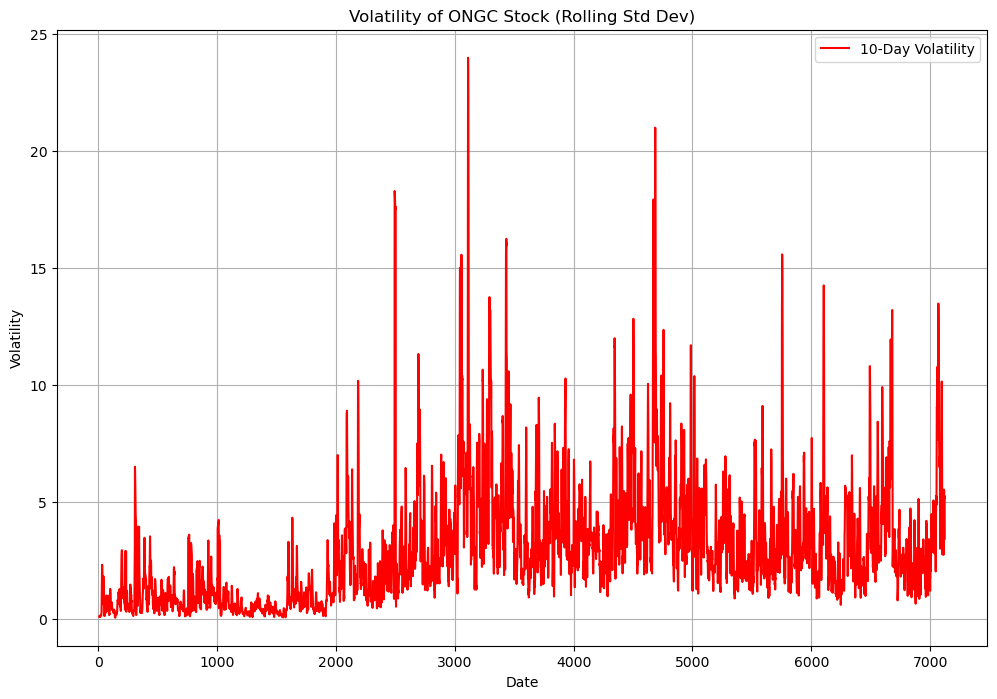

In [44]:
# Calculate 10-day rolling volatility (standard deviation)
Stock_df['Volatility'] = Stock_df['close'].rolling(window=10).std()

# Plot volatility
plt.figure(figsize=(12, 8))
plt.plot(Stock_df['Volatility'], label='10-Day Volatility', color='red')
plt.title('Volatility of ONGC Stock (Rolling Std Dev)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#About this volatility plot

#Red Line: 10-day rolling standard deviation of closing prices.
#Higher values mean more price fluctuation → more risk/volatility.

#This plot visualizes the 10-day rolling volatility of ONGC stock using standard deviation. Volatility is a key metric for risk analysis in financial markets. Spikes in volatility indicate periods of uncertainty or major market events, while low volatility suggests stable price movement. The graph helps identify when the stock became highly volatile, aiding in risk-aware decision-making.

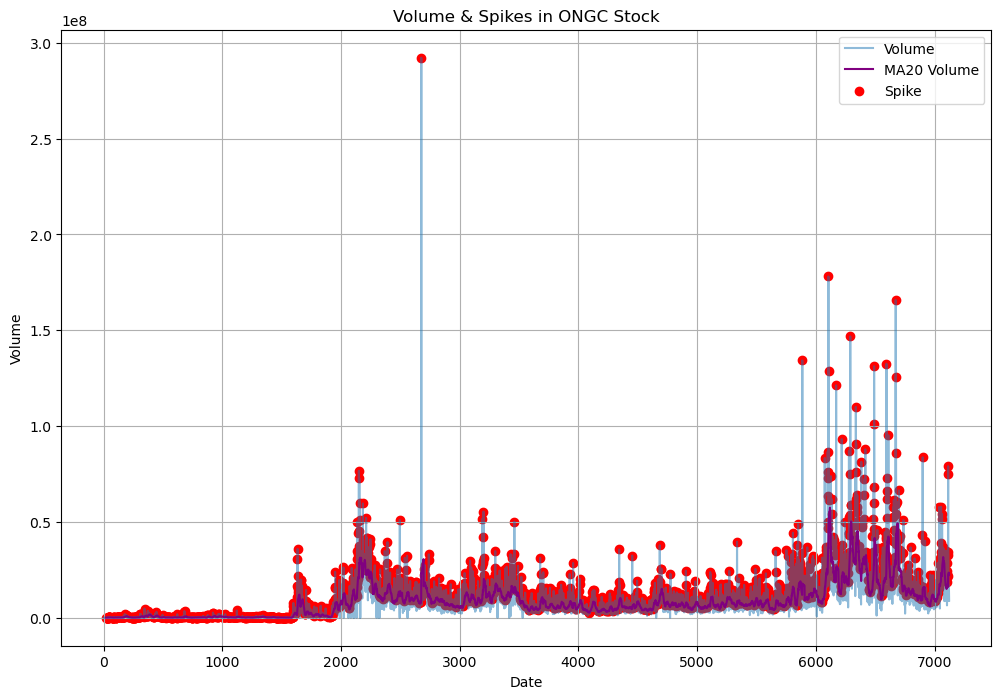

In [46]:
# Calculate rolling average of volume
Stock_df['Volume_MA20'] = Stock_df['volume'].rolling(window=20).mean()

# Detect volume spikes
Stock_df['Volume_Spike'] = Stock_df['volume'] > Stock_df['Volume_MA20']

# Plot spikes
plt.figure(figsize=(12, 8))
plt.plot(Stock_df['volume'], label='Volume', alpha=0.5)
plt.plot(Stock_df['Volume_MA20'], label='MA20 Volume', color='purple')
plt.scatter(Stock_df.index[Stock_df['Volume_Spike']],
            Stock_df['volume'][Stock_df['Volume_Spike']],
            label='Spike', color='red', marker='o')
plt.title('Volume & Spikes in ONGC Stock')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#About this volume and spikes detection plot

#Light Blue Line: Daily trading volume.
#Purple Line: 20-day moving average of volume.
#Red Dots: Volume spikes (where volume > 20-day avg).

#This graph shows ONGC's trading volume along with a 20-day volume average and highlights volume spikes using red dots. A spike occurs when the trading volume for a day significantly exceeds the 20-day average. Volume spikes often accompany important market events like earnings announcements or policy changes, making them useful indicators for identifying potential trend shifts.

In [48]:
# Saving the cleaned data 
Stock_df.to_csv("ONGC_Stock_CleanedData.csv",index = False)
print("Data cleaned & saved!")

Data cleaned & saved!
